In [5]:
from pathlib import Path
import yaml

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [6]:
def plot_star(star, y_axis, ax=None):
    
    ax = ax or plt.gca()
    
    with Path(f"../Data/{star}.yml").open() as file:
        he13272326 = yaml.load(file, Loader=yaml.FullLoader)
    
    with Path("../Data/elements.yml").open() as file:
        elements_names = yaml.load(file, Loader=yaml.FullLoader)
    
    elements = []
    zs = []
    abundances = []
    upperlimits = []
    errors = []


    for element, abundance in he13272326['Abundance'][y_axis].items():

        el = element.split('(')
        
        if 'UL)' in el:
            upperlimits.append(True)
        else:
            upperlimits.append(False)


        elements.append(el[0])
        ax.text(elements_names['charge_numbers'][el[0]]-0.4, abundance+0.3, el[0])

        zs.append(elements_names['charge_numbers'][el[0]])
        abundances.append(float(abundance))
        
        
    for element, error in he13272326['Abundance'][f"{y_axis}_error"].items():
        errors.append(float(error))
        
    

    ax.errorbar(zs, abundances, errors, uplims=upperlimits, fmt='.', label=he13272326['Star'])
    ax.legend()
    ax.set_xlabel('Z')
    ax.set_ylabel(f"[{y_axis}]");

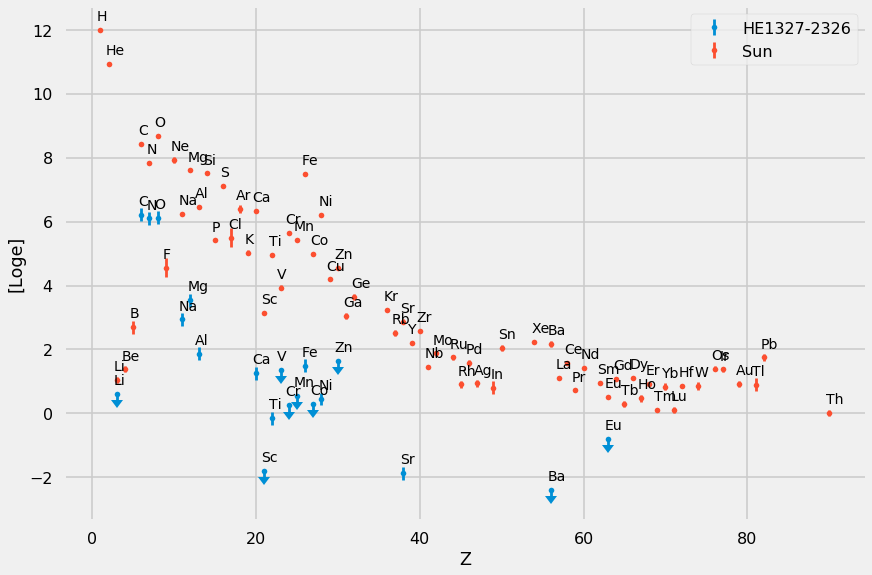

In [7]:
plot_star("HE1327-2326", 'Loge')
plot_star("Asplund", 'Loge')

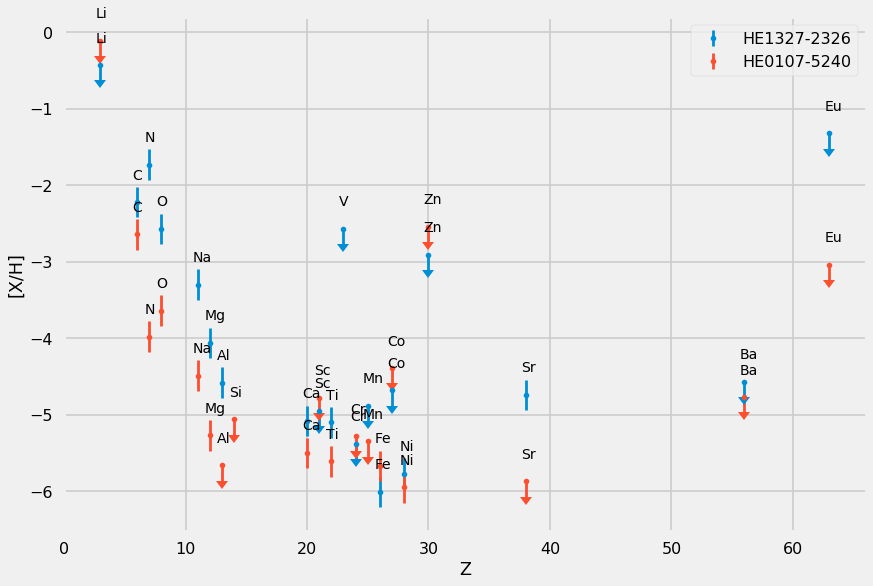

In [8]:
plot_star("HE1327-2326", "X/H")
plot_star("HE0107-5240", "X/H")